# Data Preprocessing

In [1]:
#load dataset
import numpy as np
import pandas as pd
dataset = pd.read_csv('potential-talents.csv')

In [2]:
dataset=dataset.drop(columns=['fit','location'])
dataset

,id,job_title,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,85
1,2,Native English Teacher at EPIK (English Progra...,500+
2,3,Aspiring Human Resources Professional,44
3,4,People Development Coordinator at Ryan,500+
4,5,Advisory Board Member at Celal Bayar University,500+
...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,103
100,101,Human Resources Generalist at Loparex,500+
101,102,Business Intelligence and Analytics at Travelers,49
102,103,Always set them up for Success,500+


In [3]:
# convert the connection column into strings
dataset['connection'] = dataset['connection'].astype(str)
# Remove all spaces from the 'connection' column
dataset['connection'] = dataset['connection'].str.replace(' ', '')
dataset

,id,job_title,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,85
1,2,Native English Teacher at EPIK (English Progra...,500+
2,3,Aspiring Human Resources Professional,44
3,4,People Development Coordinator at Ryan,500+
4,5,Advisory Board Member at Celal Bayar University,500+
...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,103
100,101,Human Resources Generalist at Loparex,500+
101,102,Business Intelligence and Analytics at Travelers,49
102,103,Always set them up for Success,500+


In [4]:
#convert '500+' connections to 1 and less than 500 connections to 0.
def categorize_connections(value):
    
    if value == '500+':
        return 1
    else:
        return 0

# Apply the function to the 'connection' column to create a new categorized column
dataset['connection'] = dataset['connection'].apply(categorize_connections)

dataset

,id,job_title,connection
0,1,2019 C.T. Bauer College of Business Graduate (...,0
1,2,Native English Teacher at EPIK (English Progra...,1
2,3,Aspiring Human Resources Professional,0
3,4,People Development Coordinator at Ryan,1
4,5,Advisory Board Member at Celal Bayar University,1
...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,0
100,101,Human Resources Generalist at Loparex,1
101,102,Business Intelligence and Analytics at Travelers,0
102,103,Always set them up for Success,1


# TF-IDF Approach

In [5]:
#Apply TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert job titles to numerical values using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['job_title'])
# #take a look at the sparse matrix X
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df.head())  # This will print the first 5 rows of the DataFrame.

from sklearn.metrics.pairwise import cosine_similarity

keywords = ["aspiring human resources", "seeking human resources"]  # Replace with your keywords
keywords_vector = vectorizer.transform(keywords)
# Compute similarity scores for each keyword
similarity_scores = [cosine_similarity(X, keyword_vector) for keyword_vector in keywords_vector]

# Now, similarity_scores is a list of similarity score arrays
# You might want to average the similarity scores for each keyword, or combine them in some other way
# For example, you could average them:
average_similarity_scores = np.mean(similarity_scores, axis=0)

       2019  2020  2621  408  709  about  administration  administrative  \
0  0.317019   0.0   0.0  0.0  0.0    0.0             0.0             0.0   
1  0.000000   0.0   0.0  0.0  0.0    0.0             0.0             0.0   
2  0.000000   0.0   0.0  0.0  0.0    0.0             0.0             0.0   
3  0.000000   0.0   0.0  0.0  0.0    0.0             0.0             0.0   
4  0.000000   0.0   0.0  0.0  0.0    0.0             0.0             0.0   

   admissions  advisory  ...   up  victoria  wellington  western  westfield  \
0         0.0  0.000000  ...  0.0       0.0         0.0      0.0        0.0   
1         0.0  0.000000  ...  0.0       0.0         0.0      0.0        0.0   
2         0.0  0.000000  ...  0.0       0.0         0.0      0.0        0.0   
3         0.0  0.000000  ...  0.0       0.0         0.0      0.0        0.0   
4         0.0  0.415694  ...  0.0       0.0         0.0      0.0        0.0   

   with  within  woodlands  work  world  
0   0.0     0.0        0.0

In [6]:
#add new column 'average_similarity_score' to dataset
dataset['average_similarity_score'] = average_similarity_scores

In [7]:
#sort the dataset based on average_similarity_score
sorted_dataset = dataset.sort_values(by='average_similarity_score', ascending=False)
#get the top 10 job candidates
sorted_dataset.iloc[:10,:]

,id,job_title,connection,average_similarity_score
72,73,"Aspiring Human Resources Manager, seeking inte...",0,0.553403
45,46,Aspiring Human Resources Professional,0,0.539892
32,33,Aspiring Human Resources Professional,0,0.539892
16,17,Aspiring Human Resources Professional,0,0.539892
57,58,Aspiring Human Resources Professional,0,0.539892
96,97,Aspiring Human Resources Professional,0,0.539892
2,3,Aspiring Human Resources Professional,0,0.539892
20,21,Aspiring Human Resources Professional,0,0.539892
35,36,Aspiring Human Resources Specialist,0,0.498402
5,6,Aspiring Human Resources Specialist,0,0.498402


In [8]:
#As you can see, the top candidates have very good matching job titles that include 'Aspiring Human Resources' keyword.

In [9]:
#Note that 'HR Senior Specialist' has an average similarity score of 0
#But, clearly, we wouldn't want to exclude such job titles.
dataset[dataset['job_title']=='HR Senior Specialist']

,id,job_title,connection,average_similarity_score
7,8,HR Senior Specialist,1,0.0
25,26,HR Senior Specialist,1,0.0
37,38,HR Senior Specialist,1,0.0
50,51,HR Senior Specialist,1,0.0
60,61,HR Senior Specialist,1,0.0


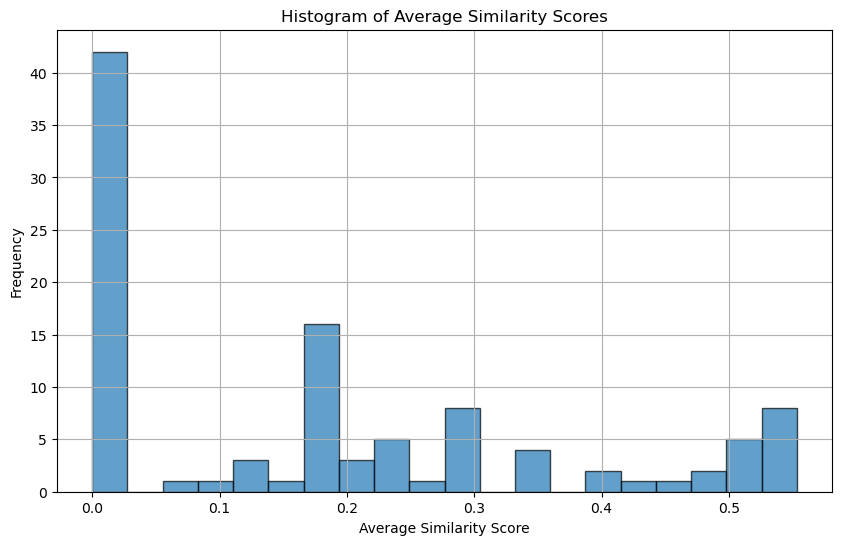

In [10]:
#Plot histogram of average similarity scores
import matplotlib.pyplot as plt

scores = dataset['average_similarity_score']

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Average Similarity Scores')
plt.xlabel('Average Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
#Based on the histogram, there are lots of candidates with a score of 0; so those are ones we can filter out.
#A good cut-off point might be 0.1 and above.
filtered_dataset = dataset[dataset['average_similarity_score'] >= 0.1]
filtered_dataset

,id,job_title,connection,average_similarity_score
0,1,2019 C.T. Bauer College of Business Graduate (...,0,0.190076
2,3,Aspiring Human Resources Professional,0,0.539892
5,6,Aspiring Human Resources Specialist,0,0.498402
6,7,Student at Humber College and Aspiring Human R...,0,0.287006
8,9,Student at Humber College and Aspiring Human R...,0,0.287006
9,10,Seeking Human Resources HRIS and Generalist Po...,1,0.333721
12,13,Human Resources Coordinator at InterContinenta...,1,0.173434
13,14,2019 C.T. Bauer College of Business Graduate (...,0,0.190076
14,15,2019 C.T. Bauer College of Business Graduate (...,0,0.190076
16,17,Aspiring Human Resources Professional,0,0.539892


In [12]:
#sort the filtered_dataset
sorted_filtered_dataset = filtered_dataset.sort_values(by='average_similarity_score', ascending=False)
sorted_filtered_dataset

,id,job_title,connection,average_similarity_score
72,73,"Aspiring Human Resources Manager, seeking inte...",0,0.553403
20,21,Aspiring Human Resources Professional,0,0.539892
32,33,Aspiring Human Resources Professional,0,0.539892
45,46,Aspiring Human Resources Professional,0,0.539892
57,58,Aspiring Human Resources Professional,0,0.539892
2,3,Aspiring Human Resources Professional,0,0.539892
96,97,Aspiring Human Resources Professional,0,0.539892
16,17,Aspiring Human Resources Professional,0,0.539892
48,49,Aspiring Human Resources Specialist,0,0.498402
23,24,Aspiring Human Resources Specialist,0,0.498402


# Word Embedding Approach

In [13]:
!pip install gensim
!pip install python-Levenshtein

import gensim
#get preprocessed job titles; each job title will become a list of tokenized words
job_titles = dataset.job_title.apply(gensim.utils.simple_preprocess)

C:\Users\Richard Han\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [14]:
import gensim.downloader as api

# Load a pre-trained model (this might take some time)
model = api.load('word2vec-google-news-300')

In [15]:
import numpy as np

# Assume 'model' is your loaded Word2Vec model
# 'job_titles' is a list of preprocessed (tokenized) job titles

def vectorize_job_title(job_title, model):
    # Vectorize each word in the job title
    word_vectors = [model[word] for word in job_title if word in model]
    
    # If no words in the job title are in the model, return a zero vector
    if not word_vectors:
        return np.zeros(model.vector_size)
    
    # Otherwise, return the mean of the word vectors
    return np.mean(word_vectors, axis=0)

# Vectorize all job titles
job_title_vectors = np.array([vectorize_job_title(title, model) for title in job_titles])


In [16]:
job_title_vectors.shape

(104, 300)

In [17]:
#Vectorize the keywords

def preprocess(text):
    # Simple preprocessing: tokenizing and lowercasing
    return gensim.utils.simple_preprocess(text)

def get_phrase_vector(phrase, model):
    words = preprocess(phrase)
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no words are found
    return np.mean(word_vectors, axis=0)

keywords = ["aspiring human resources", "seeking human resources"]
keywords_vector = np.array([get_phrase_vector(keyword, model) for keyword in keywords])

In [18]:
# Initialize a list to hold all the similarity scores
all_similarity_scores = []

# Loop through each keyword vector
for keyword_vector in keywords_vector:
    # Reshape keyword vector to 2D array of shape (1, 300) for compatibility with cosine_similarity function
    keyword_vector_reshaped = keyword_vector.reshape(1, -1)

    # Compute the cosine similarity between the keyword vector and all job title vectors
    similarity_scores = cosine_similarity(job_title_vectors, keyword_vector_reshaped)

    # similarity_scores will be an array of shape (104, 1), where each value is the similarity of the keyword to each job title
    # Flatten the array and append to the list of all scores
    all_similarity_scores.append(similarity_scores.flatten())

# Convert the list of arrays into a numpy array for easier manipulation
# The resulting array will have a shape of (2, 104), where each row corresponds to a keyword
all_similarity_scores = np.array(all_similarity_scores)
average_similarity_scores = np.mean(all_similarity_scores, axis=0)

In [19]:
#add new column 'average_similarity_score' to dataset
dataset['average_similarity_score_w2v'] = average_similarity_scores

In [20]:
#sort the dataset based on average_similarity_score
sorted_dataset = dataset.sort_values(by='average_similarity_score_w2v', ascending=False)
#get the top 10 job candidates
sorted_dataset.iloc[:10,:]

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v
72,73,"Aspiring Human Resources Manager, seeking inte...",0,0.553403,0.851056
73,74,Human Resources Professional,0,0.421235,0.829245
23,24,Aspiring Human Resources Specialist,0,0.498402,0.824286
48,49,Aspiring Human Resources Specialist,0,0.498402,0.824286
59,60,Aspiring Human Resources Specialist,0,0.498402,0.824286
5,6,Aspiring Human Resources Specialist,0,0.498402,0.824286
35,36,Aspiring Human Resources Specialist,0,0.498402,0.824286
29,30,Seeking Human Resources Opportunities,0,0.476375,0.823213
27,28,Seeking Human Resources Opportunities,0,0.476375,0.823213
98,99,Seeking Human Resources Position,0,0.461987,0.822808


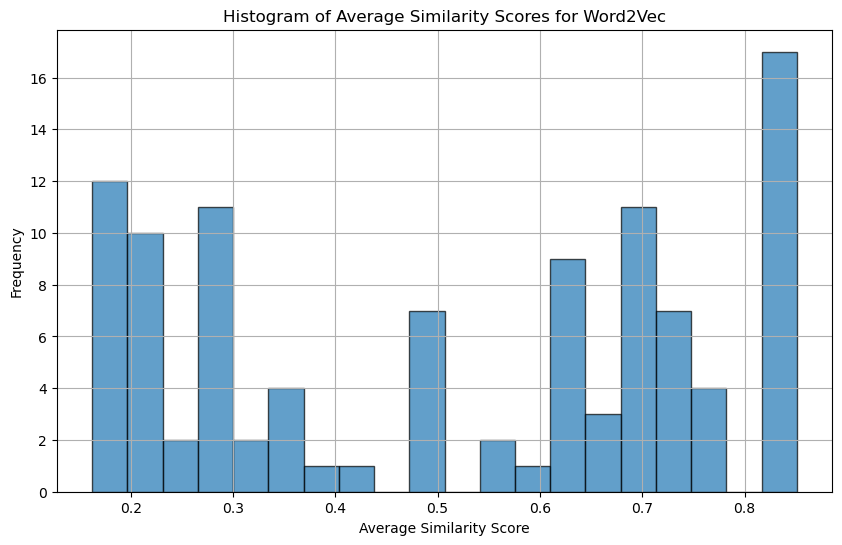

In [21]:
#Plot histogram of average similarity scores
import matplotlib.pyplot as plt

scores = dataset['average_similarity_score_w2v']

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Average Similarity Scores for Word2Vec')
plt.xlabel('Average Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [22]:
#A good cut-off point might be 0.5 and above.
filtered_dataset = dataset[dataset['average_similarity_score_w2v'] >= 0.5]
filtered_dataset.head()

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v
2,3,Aspiring Human Resources Professional,0,0.539892,0.822808
5,6,Aspiring Human Resources Specialist,0,0.498402,0.824286
6,7,Student at Humber College and Aspiring Human R...,0,0.287006,0.699619
8,9,Student at Humber College and Aspiring Human R...,0,0.287006,0.699619
9,10,Seeking Human Resources HRIS and Generalist Po...,1,0.333721,0.750647


In [23]:
#sort the filtered_dataset
sorted_filtered_dataset = filtered_dataset.sort_values(by='average_similarity_score_w2v', ascending=False)
sorted_filtered_dataset.head()

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v
72,73,"Aspiring Human Resources Manager, seeking inte...",0,0.553403,0.851056
73,74,Human Resources Professional,0,0.421235,0.829245
59,60,Aspiring Human Resources Specialist,0,0.498402,0.824286
5,6,Aspiring Human Resources Specialist,0,0.498402,0.824286
23,24,Aspiring Human Resources Specialist,0,0.498402,0.824286


In [24]:
sorted_dataset
#If we take a look at the full dataset, we notice that there may be job titles that we are interestd in
# but that have low similarity scores.
#For example, we may be ignoring HR Senior Specialist; this is a limitation of word2vec models.
#The word2vec model assigns a very low score of 'HR Senior Specialist', which is better than assigning
#it 0 like TF-IDF did.
# We might want to look at sentencetransformers to try and overcome the limitations of word2vec.

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v
72,73,"Aspiring Human Resources Manager, seeking inte...",0,0.553403,0.851056
73,74,Human Resources Professional,0,0.421235,0.829245
23,24,Aspiring Human Resources Specialist,0,0.498402,0.824286
48,49,Aspiring Human Resources Specialist,0,0.498402,0.824286
59,60,Aspiring Human Resources Specialist,0,0.498402,0.824286
...,...,...,...,...,...
50,51,HR Senior Specialist,1,0.000000,0.164199
7,8,HR Senior Specialist,1,0.000000,0.164199
25,26,HR Senior Specialist,1,0.000000,0.164199
37,38,HR Senior Specialist,1,0.000000,0.164199


# SentenceTransformers Approach

In [25]:
#Load sentence transformers and libraries
!pip install sentence-transformers
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [26]:
#load pretrained model
model = SentenceTransformer('all-MiniLM-L6-v2')


In [27]:
#get lists of job titles and keywords
job_titles = dataset['job_title'].tolist()
keywords = ["aspiring human resources", "seeking human resources"]

In [28]:
#encode texts
job_title_embeddings = model.encode(job_titles, convert_to_tensor=True)
keyword_embeddings = model.encode(keywords, convert_to_tensor=True)


In [29]:
#compute similarities
similarity_scores = util.pytorch_cos_sim(job_title_embeddings, keyword_embeddings)


In [30]:
#get average score for each job title, and add the avg score to the dataset
dataset['average_similarity_score_ST'] = similarity_scores.mean(axis=1)


In [31]:
#sort the dataset based on average_similarity_score
sorted_dataset = dataset.sort_values(by='average_similarity_score_ST', ascending=False)
#get the top 10 job candidates
sorted_dataset[:20]

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v,average_similarity_score_ST
16,17,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
2,3,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
20,21,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
96,97,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
57,58,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
45,46,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
32,33,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
98,99,Seeking Human Resources Position,0,0.461987,0.822808,0.856455
35,36,Aspiring Human Resources Specialist,0,0.498402,0.824286,0.854354
5,6,Aspiring Human Resources Specialist,0,0.498402,0.824286,0.854354


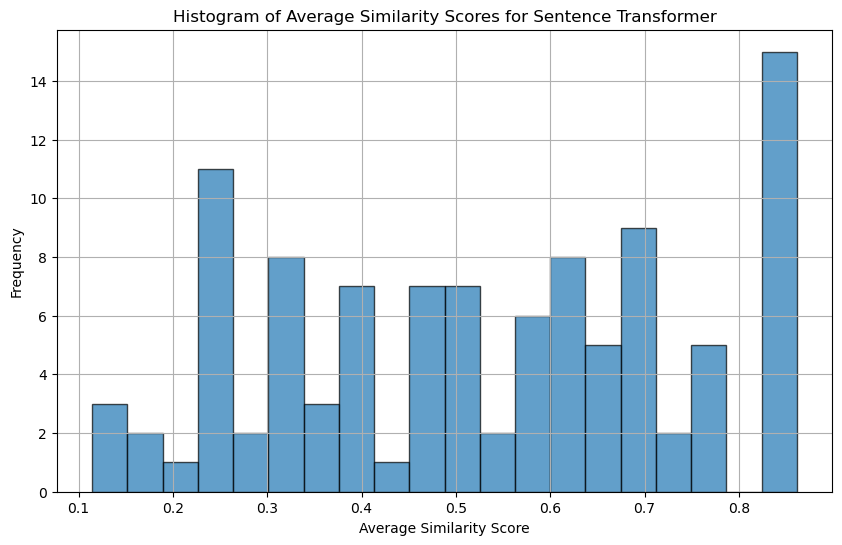

In [32]:
#Plot histogram of average similarity scores
import matplotlib.pyplot as plt

scores = dataset['average_similarity_score_ST']

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Average Similarity Scores for Sentence Transformer')
plt.xlabel('Average Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [33]:
#A good cut-off point might be 0.4 and above.
filtered_dataset = dataset[(dataset['average_similarity_score_ST'] >= 0.4)]
filtered_dataset

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v,average_similarity_score_ST
0,1,2019 C.T. Bauer College of Business Graduate (...,0,0.190076,0.497574,0.500304
2,3,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
5,6,Aspiring Human Resources Specialist,0,0.498402,0.824286,0.854354
6,7,Student at Humber College and Aspiring Human R...,0,0.287006,0.699619,0.693672
7,8,HR Senior Specialist,1,0.000000,0.164199,0.487802
...,...,...,...,...,...,...
93,94,Seeking Human Resources Opportunities. Open t...,0,0.226863,0.663046,0.617581
96,97,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
98,99,Seeking Human Resources Position,0,0.461987,0.822808,0.856455
99,100,Aspiring Human Resources Manager | Graduating ...,0,0.292887,0.731792,0.718113


In [34]:
#sort the filtered_dataset
sorted_filtered_dataset = filtered_dataset.sort_values(by='average_similarity_score_ST', ascending=False)
sorted_filtered_dataset

,id,job_title,connection,average_similarity_score,average_similarity_score_w2v,average_similarity_score_ST
96,97,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
2,3,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
57,58,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
45,46,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
32,33,Aspiring Human Resources Professional,0,0.539892,0.822808,0.861254
...,...,...,...,...,...,...
50,51,HR Senior Specialist,1,0.000000,0.164199,0.487802
7,8,HR Senior Specialist,1,0.000000,0.164199,0.487802
80,81,Senior Human Resources Business Partner at Hei...,0,0.138826,0.634236,0.471104
82,83,HR Manager at Endemol Shine North America,0,0.000000,0.162396,0.461107


In [35]:
#Now, we see that 'HR Senior Specialist' has a higher score than that given 
#by word2vec, better indicating its relevance.

# Re-ranking Candidates based on Starring

In [36]:
#Suppose I star a candidate with id 28.  Then, I can include the job title for candidate 28
# in keywords, then compute the average similarity scores based on the updated set of keywords.
#Based on these new similarity scores, I can re-rank the candidates.

In [37]:
#define a function star that takes in the id of the starred candidate and returns the sorted dataset based on 
#the updated keywords that includes the starred candidate's job title
def star(id):
    #append job_title of starred candidate to keywords
    keywords.append(dataset[dataset['id']==id]['job_title'].iloc[0].lower())
    #encode texts
    job_title_embeddings = model.encode(job_titles, convert_to_tensor=True)
    keyword_embeddings = model.encode(keywords, convert_to_tensor=True)
    #compute similarities
    similarity_scores = util.pytorch_cos_sim(job_title_embeddings, keyword_embeddings)
    #get average score for each job title, and add the avg score to the dataset
    dataset['average_similarity_score_ST'] = similarity_scores.mean(axis=1)
    #sort the dataset based on average_similarity_score
    sorted_dataset = dataset.sort_values(by='average_similarity_score_ST', ascending=False)
    return sorted_dataset

# Build an App for Demonstration

In [38]:
!pip install gradio

In [39]:
#Load sentence transformers and libraries
!pip install sentence-transformers
import pandas as pd
from sentence_transformers import SentenceTransformer, util
#load pretrained model
model = SentenceTransformer('all-MiniLM-L6-v2')

def rank_job_titles(keywords):
    # Your code to process the key_phrase and rank job titles
    # For example, calculate similarity scores and sort job titles based on these scores
    
    # Split the input string into individual keywords
    keywords_list = keywords.split(',')

    # Trim whitespace from each keyword
    keywords_list = [keyword.strip() for keyword in keywords_list]
    #encode texts
    job_title_embeddings = model.encode(job_titles, convert_to_tensor=True)
    keyword_embeddings = model.encode(keywords_list, convert_to_tensor=True)
    #compute similarities
    similarity_scores = util.pytorch_cos_sim(job_title_embeddings, keyword_embeddings)
    #get average score for each job title, and add the avg score to the dataset
    dataset['average_similarity_score_ST'] = similarity_scores.mean(axis=1)
    #sort the dataset based on average_similarity_score
    sorted_dataset = dataset.sort_values(by='average_similarity_score_ST', ascending=False)
    

    return sorted_dataset[['id','job_title']]


In [40]:
#Create a gradio interface
import gradio as gr

iface = gr.Interface(
    fn=rank_job_titles, 
    inputs=gr.Textbox(placeholder="Enter keywords separated by commas"), 
    outputs=gr.Dataframe()
)


In [41]:
#launch interface
iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
